In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
from scipy.interpolate import PchipInterpolator
from scipy.interpolate import CubicSpline
import math as m

In [2]:
x=np.array([(i-1)/10 for i in range(1,12,1) ])

In [3]:
y=np.array([erf(i) for i in x])

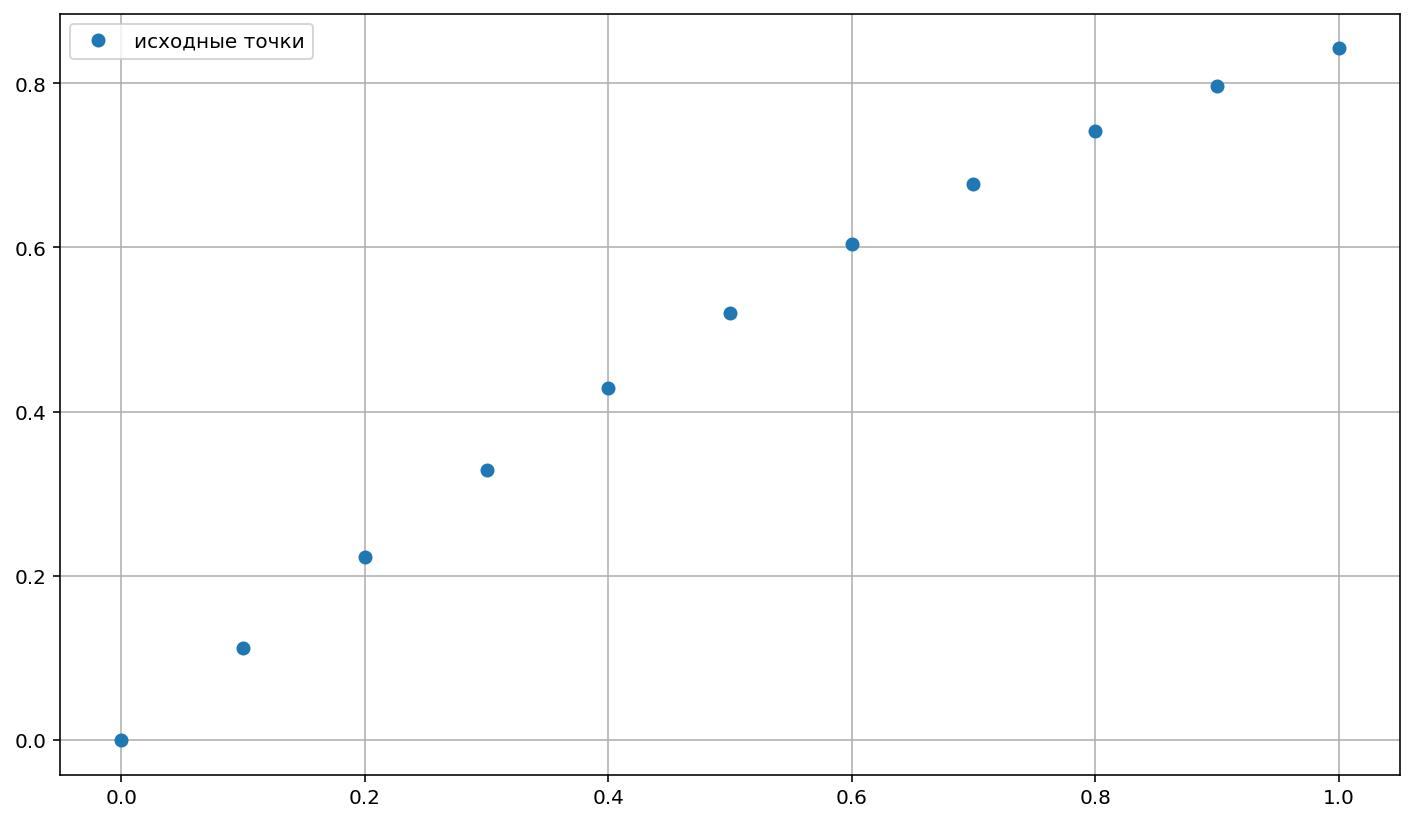

In [4]:
#Отрисовываю исходные точки
plt.plot(x,y,'o', label='исходные точки')
plt.grid()
plt.legend()

In [5]:
#Задаю матрицу полинома 10 степени
matrix=np.array([[0**0  ,0  ,0     ,0     ,0     ,0     ,0     ,0     ,0     ,0     ,0      ],  
                 [0.1**0,0.1,0.1**2,0.1**3,0.1**4,0.1**5,0.1**6,0.1**7,0.1**8,0.1**9,0.1**10],
                 [0.2**0,0.2,0.2**2,0.2**3,0.2**4,0.2**5,0.2**6,0.2**7,0.2**8,0.2**9,0.2**10],
                 [0.3**0,0.3,0.3**2,0.3**3,0.3**4,0.3**5,0.3**6,0.3**7,0.3**8,0.3**9,0.3**10],
                 [0.4**0,0.4,0.4**2,0.4**3,0.4**4,0.4**5,0.4**6,0.4**7,0.4**8,0.4**9,0.4**10],
                 [0.5**0,0.5,0.5**2,0.5**3,0.5**4,0.5**5,0.5**6,0.5**7,0.5**8,0.5**9,0.5**10],
                 [0.6**0,0.6,0.6**2,0.6**3,0.6**4,0.6**5,0.6**6,0.6**7,0.6**8,0.6**9,0.6**10],
                 [0.7**0,0.7,0.7**2,0.7**3,0.7**4,0.7**5,0.7**6,0.7**7,0.7**8,0.7**9,0.7**10],
                 [0.8**0,0.8,0.8**2,0.8**3,0.8**4,0.8**5,0.8**6,0.8**7,0.8**8,0.8**9,0.8**10],
                 [0.9**0,0.9,0.9**2,0.9**3,0.9**4,0.9**5,0.9**6,0.9**7,0.9**8,0.9**9,0.9**10],
                 [1.    ,1. ,1.    ,1.    ,1.    ,1.    ,1.    ,1.    ,1.    ,1     ,1      ]])


In [6]:
#Число обусловленности, как видим оно очень большое, это значит, что погрешность решения решения при произвольных свободных членах будет большой
np.linalg.cond(matrix)

115575244.55857426

In [7]:
#Задаю матрицы полиномов с 9 по 1 степень
matrix1=np.array([[0**0 ,0  ,0     ,0     ,0     ,0     ,0     ,0     ,0     ,0     ],  
                 [0.1**0,0.1,0.1**2,0.1**3,0.1**4,0.1**5,0.1**6,0.1**7,0.1**8,0.1**9],
                 [0.2**0,0.2,0.2**2,0.2**3,0.2**4,0.2**5,0.2**6,0.2**7,0.2**8,0.2**9],
                 [0.3**0,0.3,0.3**2,0.3**3,0.3**4,0.3**5,0.3**6,0.3**7,0.3**8,0.3**9],
                 [0.5**0,0.5,0.5**2,0.5**3,0.5**4,0.5**5,0.5**6,0.5**7,0.5**8,0.5**9],
                 [0.6**0,0.6,0.6**2,0.6**3,0.6**4,0.6**5,0.6**6,0.6**7,0.6**8,0.6**9],
                 [0.7**0,0.7,0.7**2,0.7**3,0.7**4,0.7**5,0.7**6,0.7**7,0.7**8,0.7**9],
                 [0.8**0,0.8,0.8**2,0.8**3,0.8**4,0.8**5,0.8**6,0.8**7,0.8**8,0.8**9],
                 [0.9**0,0.9,0.9**2,0.9**3,0.9**4,0.9**5,0.9**6,0.9**7,0.9**8,0.9**9],
                 [1**0  ,1  ,1     ,1     ,1     ,1     ,1     ,1     ,1     ,1     ]])

matrix2=np.array([[0**0 ,0  ,0     ,0     ,0     ,0     ,0     ,0     ,0     ],  
                 [0.1**0,0.1,0.1**2,0.1**3,0.1**4,0.1**5,0.1**6,0.1**7,0.1**8],
                 [0.2**0,0.2,0.2**2,0.2**3,0.2**4,0.2**5,0.2**6,0.2**7,0.2**8],
                 [0.3**0,0.3,0.3**2,0.3**3,0.3**4,0.3**5,0.3**6,0.3**7,0.3**8],
                 [0.5**0,0.5,0.5**2,0.5**3,0.5**4,0.5**5,0.5**6,0.5**7,0.5**8],
                 [0.7**0,0.7,0.7**2,0.7**3,0.7**4,0.7**5,0.7**6,0.7**7,0.7**8],
                 [0.8**0,0.8,0.8**2,0.8**3,0.8**4,0.8**5,0.8**6,0.8**7,0.8**8],
                 [0.9**0,0.9,0.9**2,0.9**3,0.9**4,0.9**5,0.9**6,0.9**7,0.9**8],
                 [1**0  ,1  ,1     ,1     ,1     ,1     ,1     ,1     ,1     ]])

matrix3=np.array([[0**0 ,0  ,0     ,0     ,0     ,0     ,0     ,0     ],  
                 [0.1**0,0.1,0.1**2,0.1**3,0.1**4,0.1**5,0.1**6,0.1**7],
                 [0.3**0,0.3,0.3**2,0.3**3,0.3**4,0.3**5,0.3**6,0.3**7],
                 [0.5**0,0.5,0.5**2,0.5**3,0.5**4,0.5**5,0.5**6,0.5**7],
                 [0.7**0,0.7,0.7**2,0.7**3,0.7**4,0.7**5,0.7**6,0.7**7],
                 [0.8**0,0.8,0.8**2,0.8**3,0.8**4,0.8**5,0.8**6,0.8**7],
                 [0.9**0,0.9,0.9**2,0.9**3,0.9**4,0.9**5,0.9**6,0.9**7],
                 [1**0  ,1  ,1     ,1     ,1     ,1     ,1     ,1     ]])

matrix4=np.array([[0**0 ,0  ,0     ,0     ,0     ,0     ,0     ],  
                 [0.1**0,0.1,0.1**2,0.1**3,0.1**4,0.1**5,0.1**6],
                 [0.3**0,0.3,0.3**2,0.3**3,0.3**4,0.3**5,0.3**6],
                 [0.5**0,0.5,0.5**2,0.5**3,0.5**4,0.5**5,0.5**6],
                 [0.7**0,0.7,0.7**2,0.7**3,0.7**4,0.7**5,0.7**6],
                 [0.9**0,0.9,0.9**2,0.9**3,0.9**4,0.9**5,0.9**6],
                 [1**0  ,1  ,1     ,1     ,1     ,1     ,1     ]])

matrix5=np.array([[0**0 ,0  ,0     ,0     ,0     ,0     ],  
                 [0.1**0,0.1,0.1**2,0.1**3,0.1**4,0.1**5],
                 [0.3**0,0.3,0.3**2,0.3**3,0.3**4,0.3**5],
                 [0.5**0,0.5,0.5**2,0.5**3,0.5**4,0.5**5],
                 [0.7**0,0.7,0.7**2,0.7**3,0.7**4,0.7**5],
                 [1**0  ,1  ,1     ,1     ,1     ,1     ]])

matrix6=np.array([[0**0 ,0  ,0     ,0     ,0     ],  
                 [0.3**0,0.3,0.3**2,0.3**3,0.3**4],
                 [0.5**0,0.5,0.5**2,0.5**3,0.5**4],
                 [0.7**0,0.7,0.7**2,0.7**3,0.7**4],
                 [1**0  ,1  ,1     ,1     ,1     ]])

matrix7=np.array([[0**0 ,0  ,0     ,0     ],  
                 [0.3**0,0.3,0.3**2,0.3**3],
                 [0.5**0,0.5,0.5**2,0.5**3],
                 [1**0  ,1  ,1     ,1     ]])

matrix8=np.array([[0**0 ,0  ,0     ],  
                 [0.5**0,0.5,0.5**2],
                 [1**0  ,1  ,1     ]])

matrix9=np.array([[0**0 ,0],  
                 [1**0  ,1]])

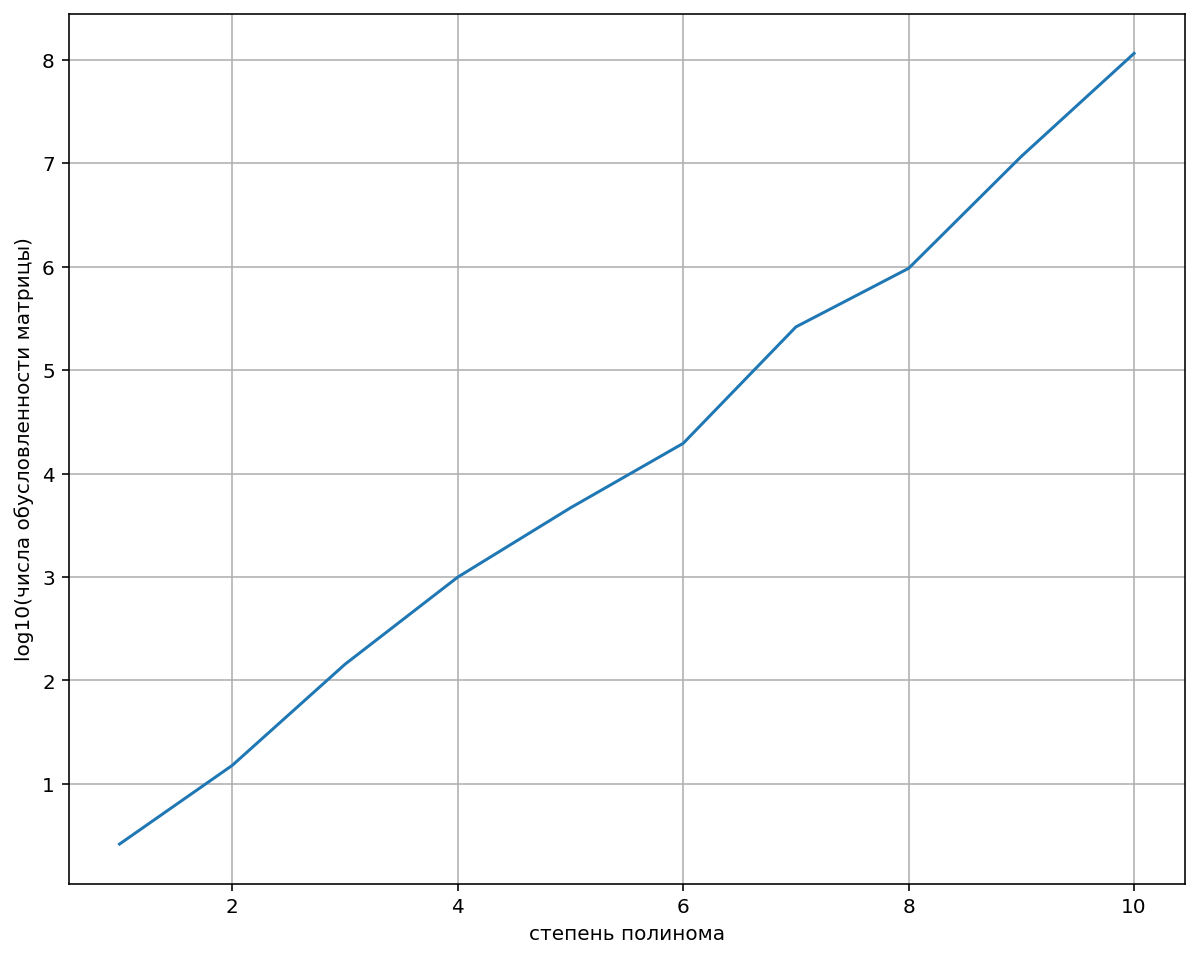

In [8]:
#Рисую график зависимости числа обусловленности от степени  полинома, с ростом степени резко возрастает число
cond=np.array([np.linalg.cond(matrix9),np.linalg.cond(matrix8),np.linalg.cond(matrix7),np.linalg.cond(matrix6),np.linalg.cond(matrix5),np.linalg.cond(matrix4),np.linalg.cond(matrix3),np.linalg.cond(matrix2),np.linalg.cond(matrix1),np.linalg.cond(matrix)])
logcond=[]
for i in cond:
    logcond.append(m.log10(i))
    
#Рисую в десятичном логарифме, без него очень резкий подъём, не очень наглядно, а тут степени десятки по оси идут
number=np.arange(1,11,1)
fig1=plt.figure(figsize=[10,8])
plt.plot(number,logcond)
plt.xlabel('степень полинома')
plt.ylabel('log10(числа обусловленности матрицы)')
plt.grid()

In [9]:
#матричное уравнение относительно коэффициентов для полинома 10 степени
coff=np.linalg.solve(matrix,y)

In [10]:
#промежуточные значения
xinterp=np.array([i for i in np.arange(0,1,0.01)])
yinterp=coff[0]+coff[1]*xinterp+coff[2]*xinterp**2+coff[3]*xinterp**3+coff[4]*xinterp**4+coff[5]*xinterp**5+coff[6]*xinterp**6+coff[7]*xinterp**7+coff[8]*xinterp**8+coff[9]*xinterp**9+coff[10]*xinterp**10

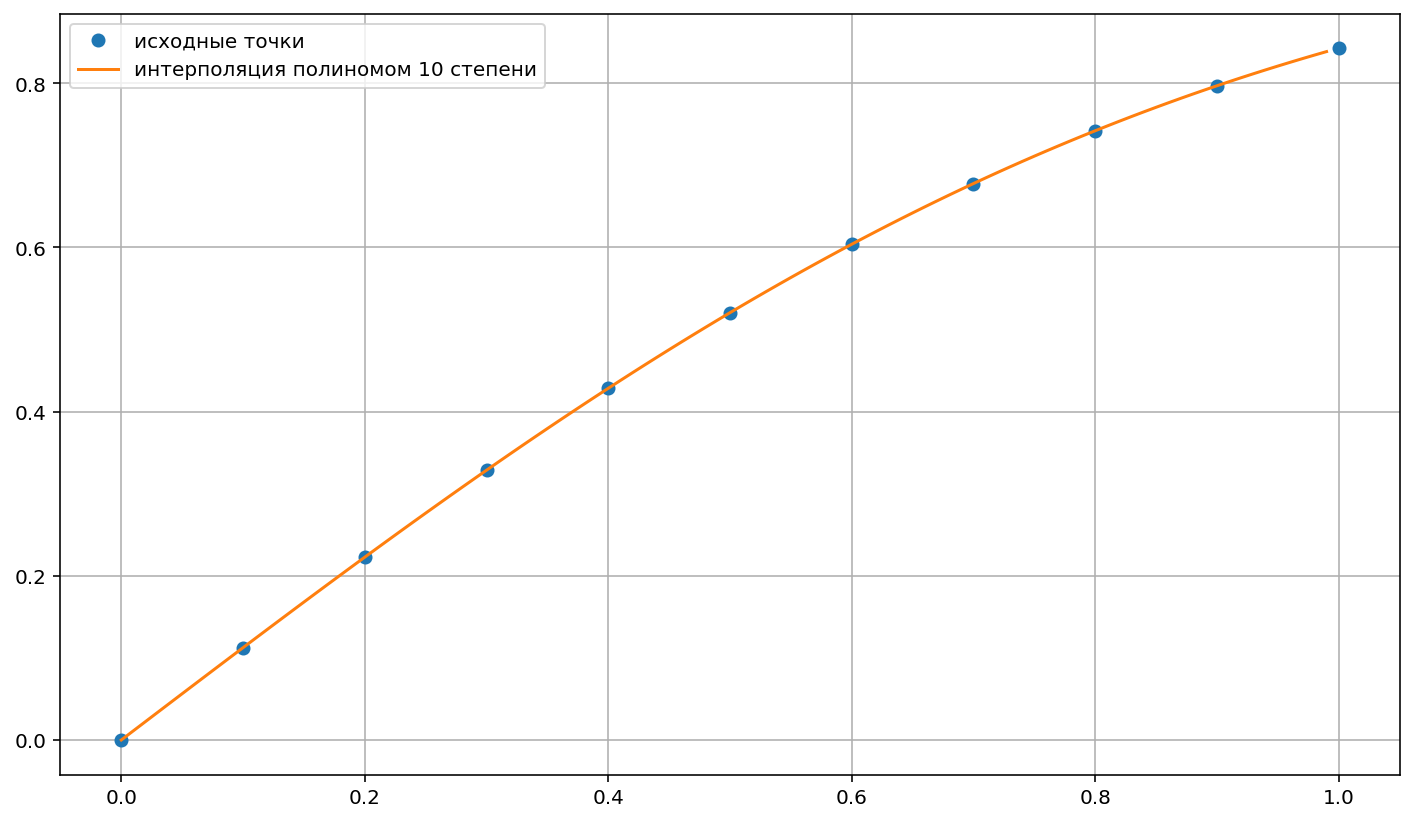

In [11]:
#Рисую точки и интерполирующую функцию
plt.plot(x,y,'o', label='исходные точки')
plt.plot(xinterp,yinterp, label='интерполяция полиномом 10 степени')
plt.grid()
plt.legend()

In [12]:
#Считаю интерполирующую функцию в узлах, чтобы посчитать ошибку
yinterp1=coff[0]+coff[1]*x+coff[2]*x**2+coff[3]*x**3+coff[4]*x**4+coff[5]*x**5+coff[6]*x**6+coff[7]*x**7+coff[8]*x**8+coff[9]*x**9+coff[10]*x**10

In [13]:
#Ошибка-норма фробениуса
np.linalg.norm(np.abs(y-yinterp1))

4.0436549343196473e-16

In [14]:
#Смотрю коэффициенты через полифит
coff_fit=np.polyfit(x,y,10)

In [15]:
yinterp_fit=coff_fit[10]+coff_fit[9]*xinterp+coff_fit[8]*xinterp**2+coff_fit[7]*xinterp**3+coff_fit[6]*xinterp**4+coff_fit[5]*xinterp**5+coff_fit[4]*xinterp**6+coff_fit[3]*xinterp**7+coff_fit[2]*xinterp**8+coff_fit[1]*xinterp**9+coff_fit[10]*xinterp**10

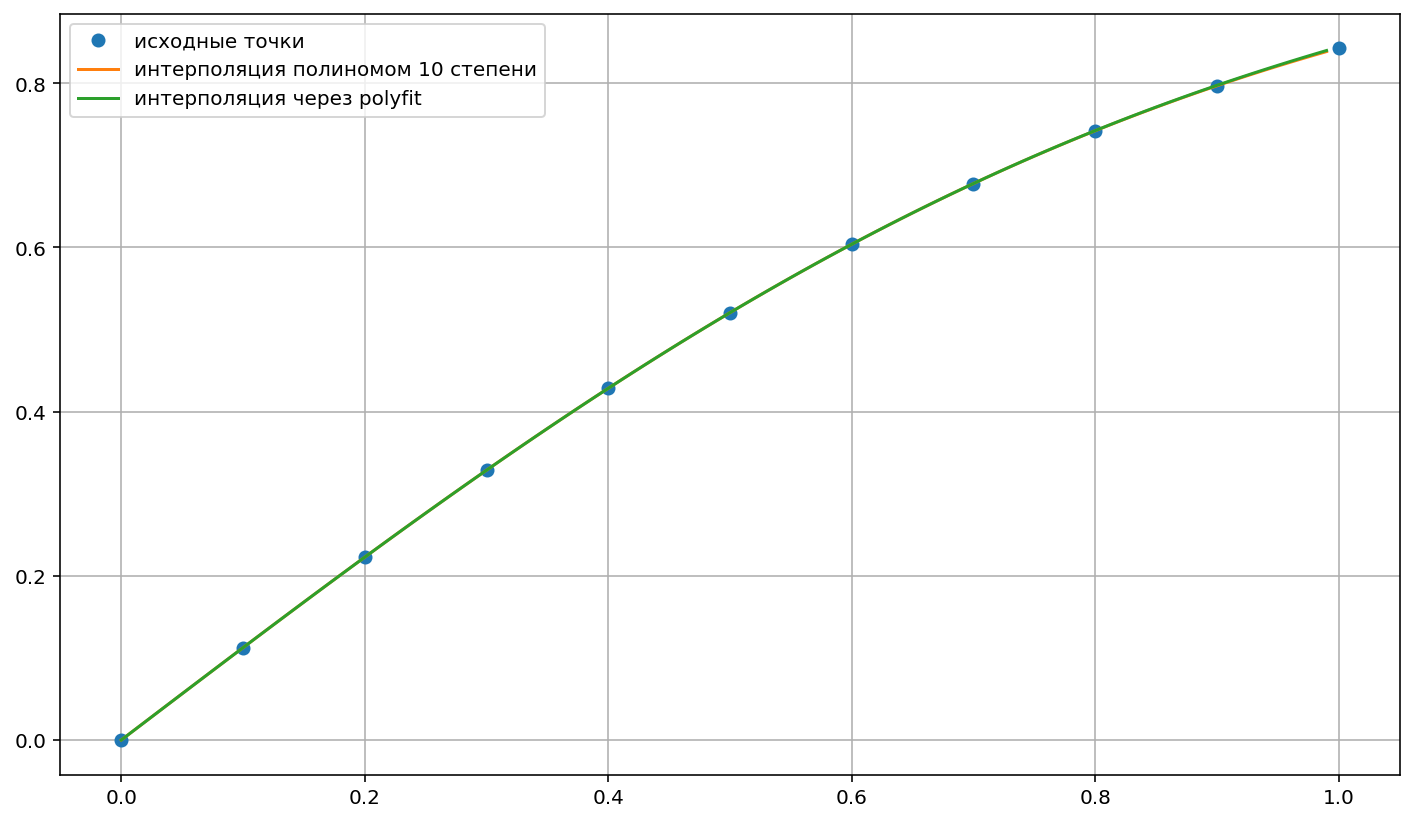

In [16]:
plt.plot(x,y,'o', label='исходные точки')
plt.plot(xinterp,yinterp, label='интерполяция полиномом 10 степени')
plt.plot(xinterp,yinterp_fit, label='интерполяция через polyfit')
plt.grid()
plt.legend()

In [17]:
print(coff)
print('как видим то же самое но с конца в начало, это и разница между тем, что мы сделали и полифитом-никакой, только порядок\n',coff_fit)

[ 0.00000000e+00  1.12837904e+00  3.55779240e-06 -3.76167525e-01
  2.56838059e-04  1.11876424e-01  2.22912366e-03 -2.99669731e-02
  2.13905203e-03  5.41662322e-03 -1.46537047e-03]
как видим то же самое но с конца в начало, это и разница между тем, что мы сделали и полифитом-никакой, только порядок
 [-1.46537043e-03  5.41662302e-03  2.13905245e-03 -2.99669736e-02
  2.22912404e-03  1.11876424e-01  2.56838112e-04 -3.76167525e-01
  3.55779326e-06  1.12837904e+00 -3.70311476e-16]


In [18]:
#Получаю объекты сплайн интерполяции
pchip=PchipInterpolator(x,y)
spline=CubicSpline(x,y)

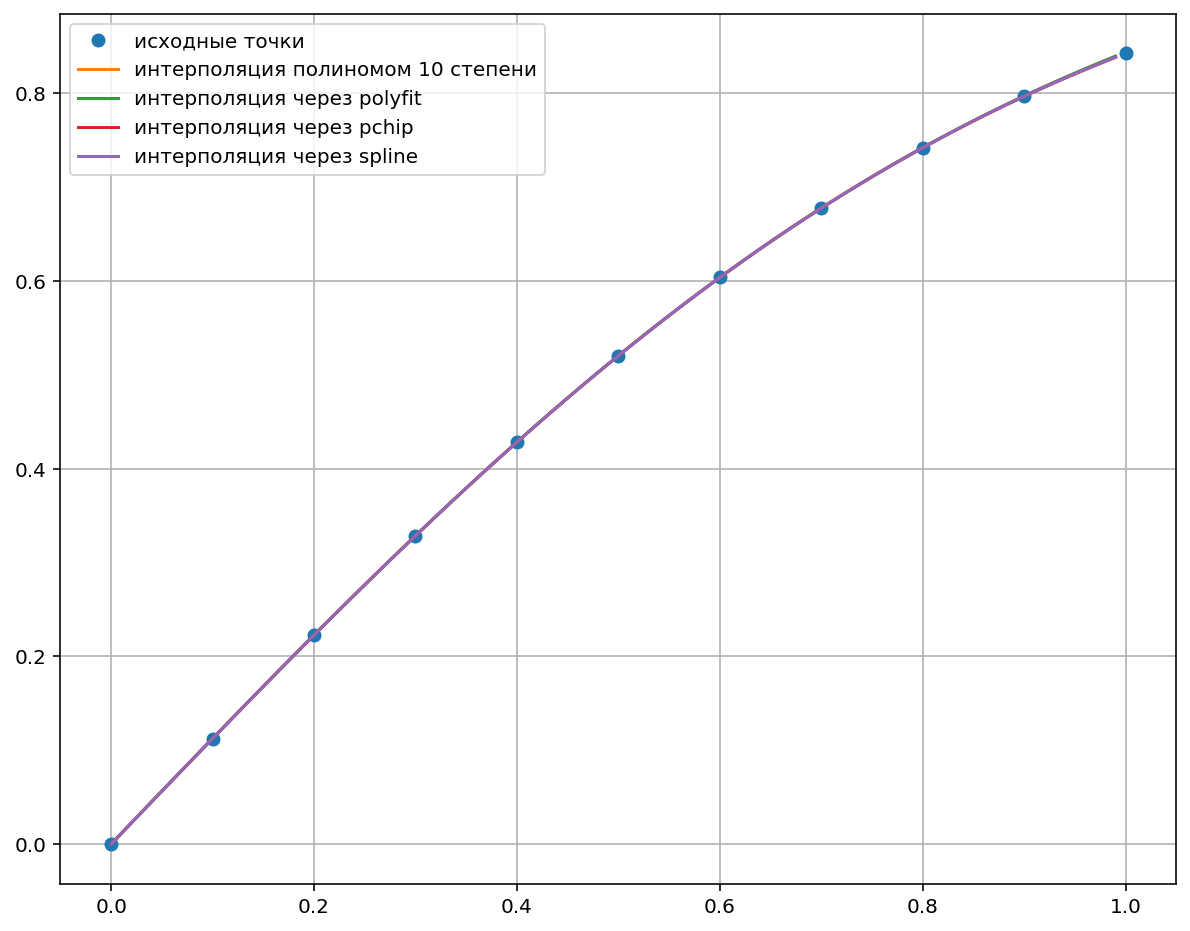

In [19]:
#Рисую всё и наглядно сравниваю,все похоже
fig=plt.figure(figsize=[10,8])
plt.plot(x,y,'o', label='исходные точки')
plt.plot(xinterp,yinterp, label='интерполяция полиномом 10 степени')
plt.plot(xinterp,yinterp_fit, label='интерполяция через polyfit')
plt.plot(xinterp,pchip(xinterp), label='интерполяция через pchip')
plt.plot(xinterp,spline(xinterp), label='интерполяция через spline')

plt.grid()
plt.legend()